# The Datasaurus Dozen: same stats, big differences, and the Simpson's Paradox

I recently came across the Datasaurus dataset by Alberto Cairo and wanted to create a series of charts illustrating the lessons associated with this dataset, primarily to:

<center>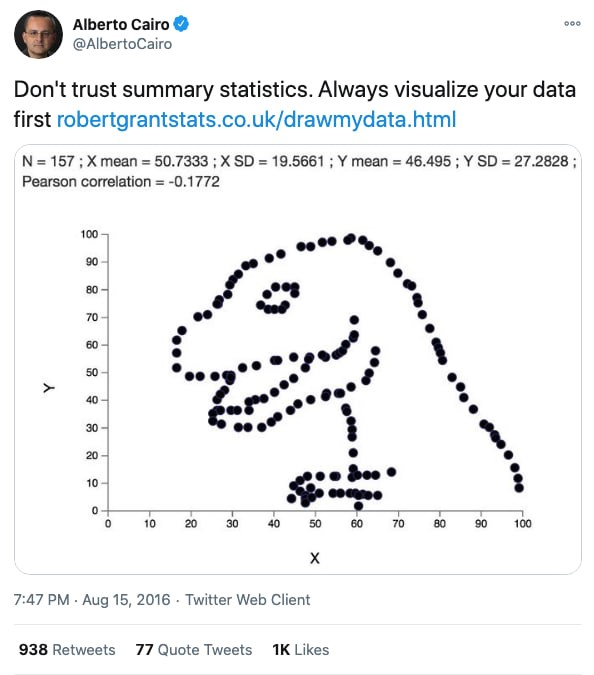</center>

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
# Few tweaked Pandas options for friendlier output:

# Use 2 decimal places in output display
%precision %.3f
pd.set_option("display.precision", 2)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

# Disable jedi autocompleter
%config Completer.use_jedi = False

plt.rcParams["figure.figsize"] = 10,8

In [3]:
df = pd.read_csv("datasaurusdozen.csv", delimiter='\t')

In [4]:
df.head()

,dataset,x,y
0,dino,55.38,97.18
1,dino,51.54,96.03
2,dino,46.15,94.49
3,dino,42.82,91.41
4,dino,40.77,88.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  1846 non-null   object 
 1   x        1846 non-null   float64
 2   y        1846 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


## Summary Statistics

In [6]:
df_desc = pd.DataFrame(index=df['dataset'].unique(), columns=['x_mean','x_std', 'y_mean', 'y_std'])
# summary statistics for x
df_desc[['x_mean', 'x_std']] = df.groupby('dataset').describe()['x'][['mean', 'std']]
# Summary statistics for y
df_desc[['y_mean', 'y_std']] = df.groupby('dataset').describe()['y'][[ 'mean', 'std']]

In [22]:
df.set_index('dataset', inplace=True)

In [11]:
for i in df.index.unique():
    df_desc.loc[i, 'pearson_corr'] = df.loc[i, 'x'].corr(df.loc[i, 'y'])
    df_desc.loc[i, 'spearman_corr'] = df.loc[i, 'x'].corr(df.loc[i, 'y'], method='spearman')

In [12]:
df_desc

,x_mean,x_std,y_mean,y_std,corr,pearson_corr,spearman_corr
dino,54.26,16.77,47.83,26.94,-0.06,-0.06,-6.51e-02
away,54.27,16.77,47.83,26.94,-0.06,-0.06,-5.73e-02
h_lines,54.26,16.77,47.83,26.94,-0.06,-0.06,-5.20e-02
v_lines,54.27,16.77,47.84,26.94,-0.07,-0.07,-5.66e-02
x_shape,54.26,16.77,47.84,26.93,-0.07,-0.07,-2.05e-02
star,54.27,16.77,47.84,26.93,-0.06,-0.06,-5.14e-02
high_lines,54.27,16.77,47.84,26.94,-0.07,-0.07,-2.87e-03
dots,54.26,16.77,47.84,26.93,-0.06,-0.06,-1.26e-01
circle,54.27,16.76,47.84,26.93,-0.07,-0.07,-7.73e-02
bullseye,54.27,16.77,47.83,26.94,-0.07,-0.07,-7.87e-02


From the above summary statistics, we might conclude that these variables are all the same. Moreover, within each variable, x and y values have very similarly low pearson's correlations ranging from -0.06 to -0.07. However as we can see from the next figure, the data of those 13 plots are very different.  
The spearmean correlation coefficient capture better this difference.

<img src="//github.com/SebastienBoyer/Teaching/raw/3a0eaaee66ab9a99524028e714ca2fdee3d02fde/Intro_to_stats_in_life_sciences/images/DinoSequentialSmaller.gif" alt="DinoSequentialSmaller.gif">

## Data Visualization

We now see why it is important to visualize our data. However, different plots, capture different information.  

### Scatter Plot

In [28]:
df.reset_index(inplace=True)   

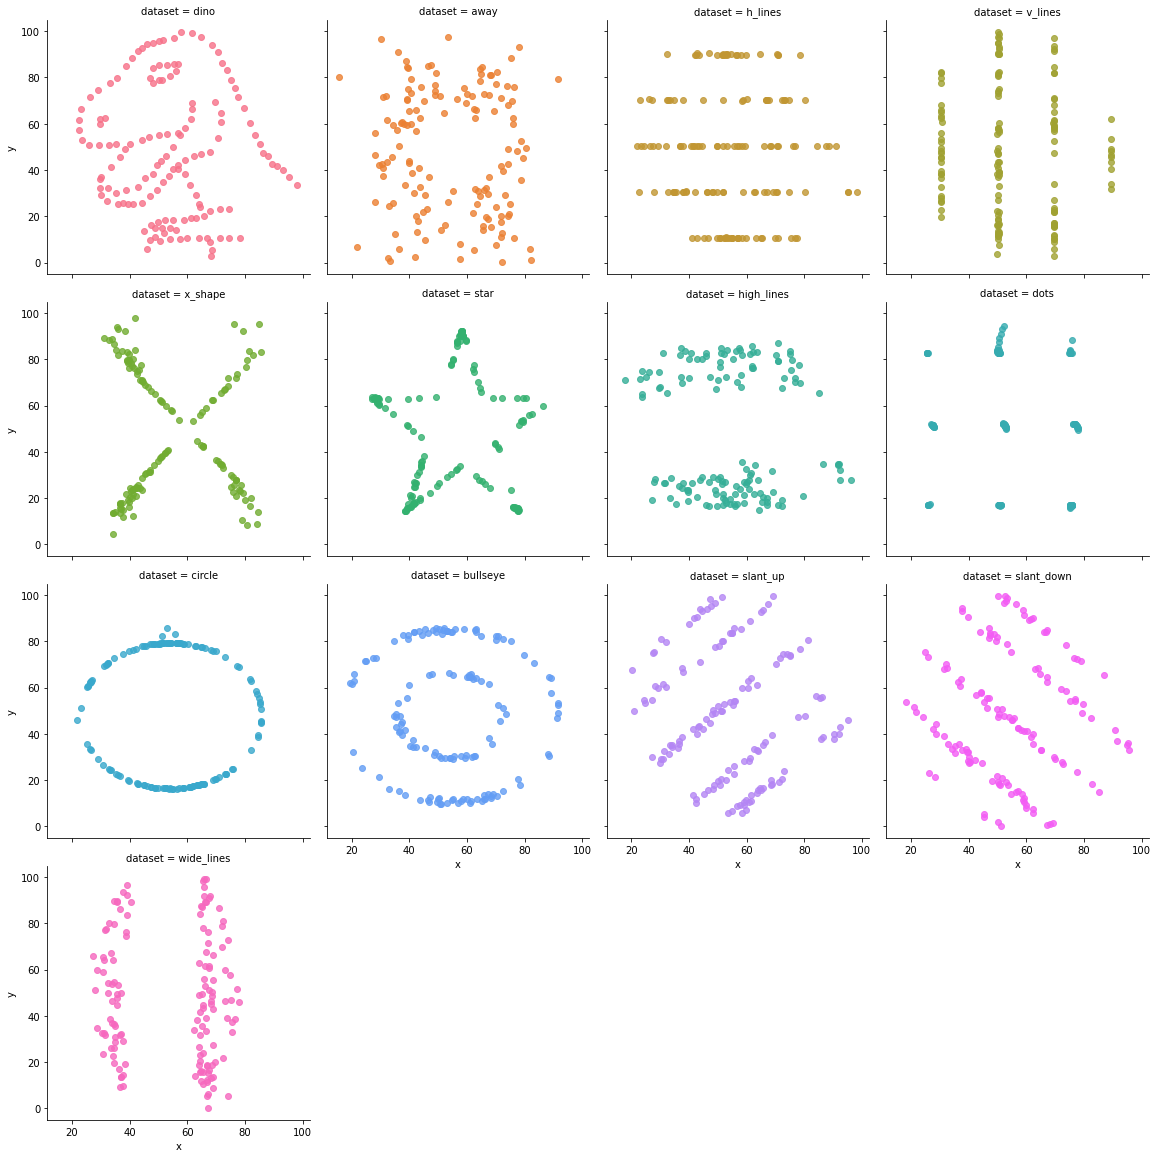

In [29]:
# plot all images
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, size=4, fit_reg = False); 

### Boxplot

Let's display the x values of each variation:

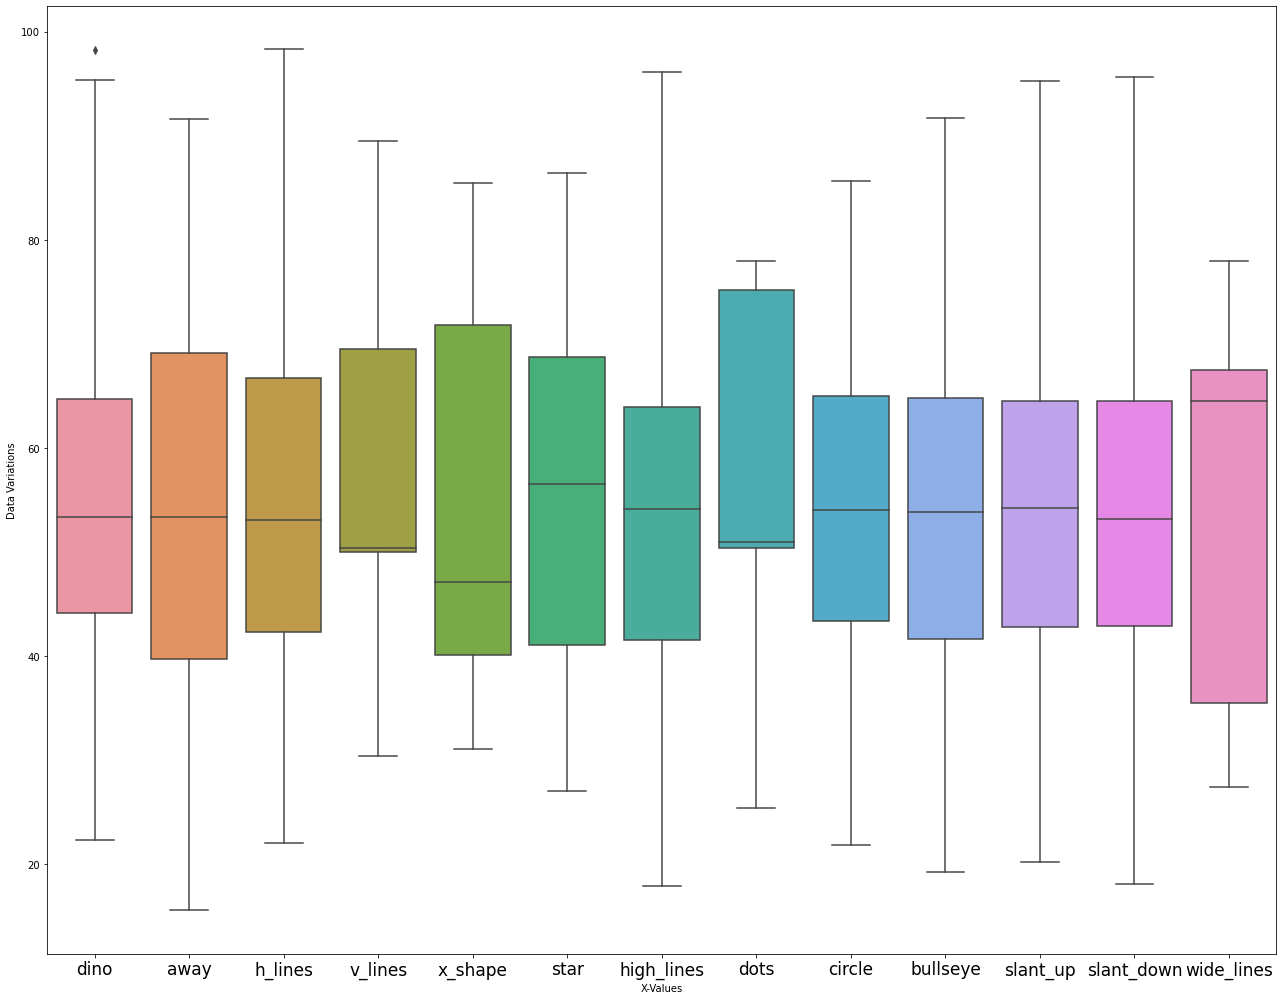

In [49]:
f, ax = plt.subplots(figsize = (18,14))
sns.boxplot(x='dataset', y='x', data=df, )
plt.xticks(fontsize=17)
plt.xlabel('x-Values')
plt.ylabel('Data Variations')
plt.tight_layout()

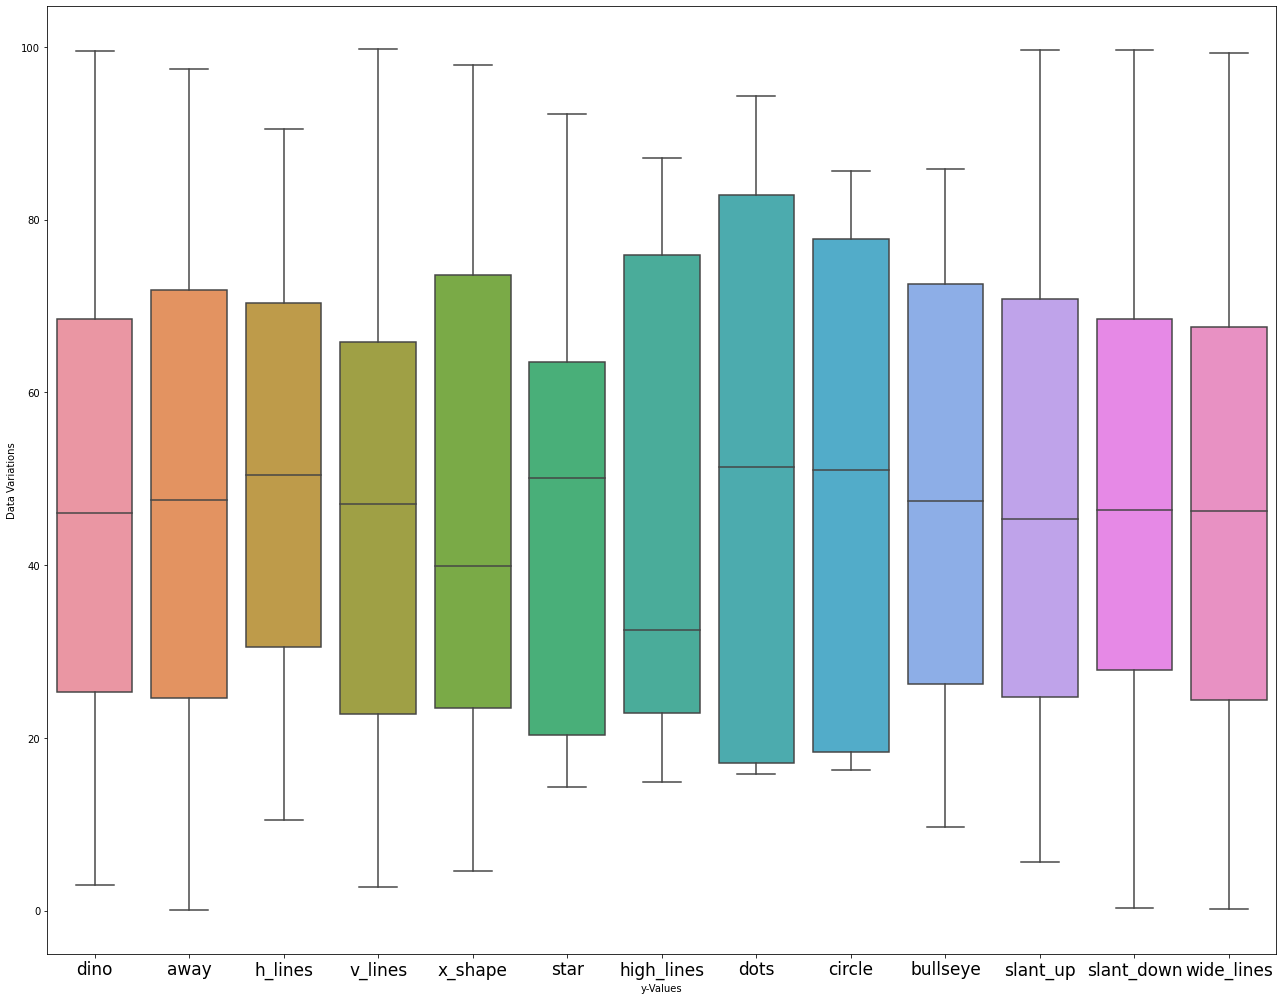

In [50]:
# and now the same plot for y values

f, ax = plt.subplots(figsize = (18,14))
sns.boxplot(x='dataset', y='y', data=df, )
plt.xticks(fontsize=17)
plt.xlabel('y-Values')
plt.ylabel('Data Variations')
plt.tight_layout()

While boxplots are great at capturing the summary statistics of one univariate data, they are not  particularly suitable at displaying bivariate or multivariate data.

### Violin Plots

In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

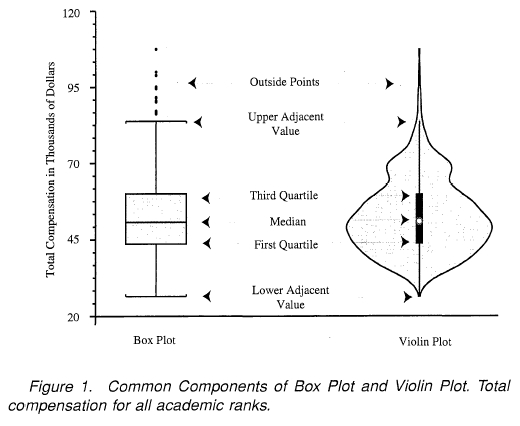

The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.


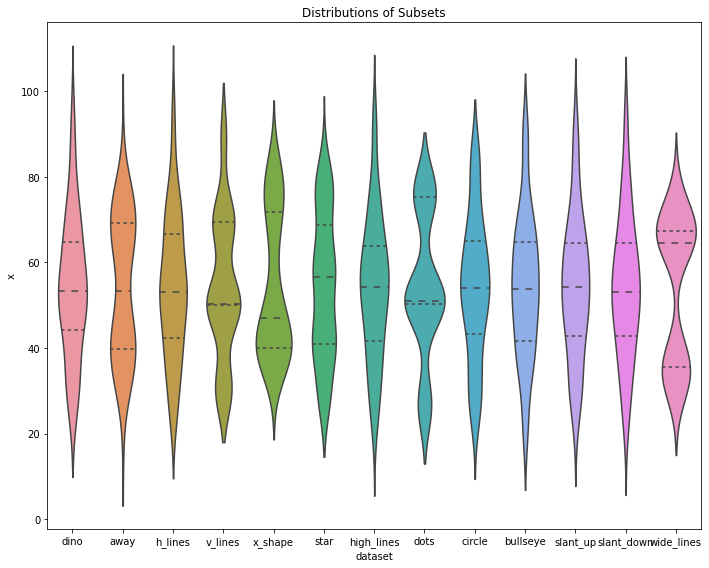

In [92]:
plt.title("Distributions of Subsets", )
sns.violinplot( x = 'dataset', y = 'x', data=df, inner='quartile')
#sns.swarmplot(x='dataset', y='x', data=df, color='k', alpha=.5, size=3)
plt.tight_layout()

### Ridgeline Plots
Ridgeline plots are great to visualize numerical distributions corresponding to multiple groups or categorical variables. Ridgeline plots make density plots or histograms for each group one on top of each other and thus making it look like “a mountain range”. They are great for visualizing changes in numerical distributions over time or space

In [97]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

/Users/athena/opt/miniconda3/envs/mlpocref/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/athena/opt/miniconda3/envs/mlpocref/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/athena/opt/miniconda3/envs/mlpocref/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/athena/opt/miniconda3/en

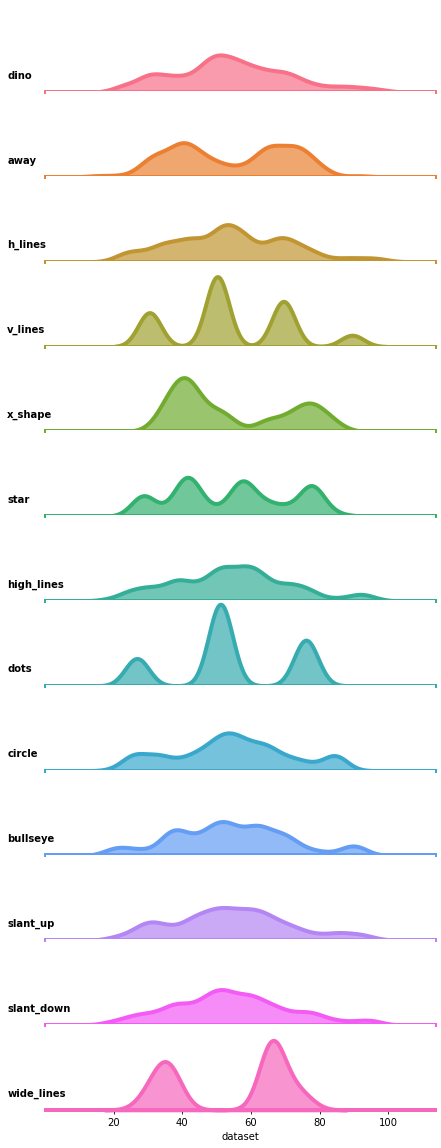

In [102]:
ridge_plot = sns.FacetGrid(df, row="dataset", hue="dataset", aspect=5, height=1.25)
ridge_plot.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=0.7, lw=4, bw=.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.map(label, "dataset")
# Set the subplots to overlap
ridge_plot.fig.subplots_adjust(hspace=-0.01)
# Remove axes details that don't play well with overlap
ridge_plot.set_titles("")
ridge_plot.set(yticks=[])
#ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
ridge_plot.despine(bottom=True, left=True)